In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/Spotify_data.csv')

#EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        227 non-null    int64  
 1   Track Name        227 non-null    object 
 2   Artists           227 non-null    object 
 3   Album Name        227 non-null    object 
 4   Album ID          227 non-null    object 
 5   Track ID          227 non-null    object 
 6   Popularity        227 non-null    int64  
 7   Release Date      227 non-null    object 
 8   Duration (ms)     227 non-null    int64  
 9   Explicit          227 non-null    bool   
 10  External URLs     227 non-null    object 
 11  Danceability      227 non-null    float64
 12  Energy            227 non-null    float64
 13  Key               227 non-null    int64  
 14  Loudness          227 non-null    float64
 15  Mode              227 non-null    int64  
 16  Speechiness       227 non-null    float64
 1

In [3]:
df.isnull().sum()

,0
Unnamed: 0,0
Track Name,0
Artists,0
Album Name,0
Album ID,0
Track ID,0
Popularity,0
Release Date,0
Duration (ms),0
Explicit,0


In [4]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Unnamed: 0  Popularity  Duration (ms)  Danceability      Energy  \
count  227.000000   227.00000     227.000000    227.000000  227.000000   
mean   113.000000    71.85022  219254.881057      0.635639    0.646665   
std     65.673435    10.24110   60483.492317      0.155123    0.159150   
min      0.000000    13.00000   96947.000000      0.271000    0.236000   
25%     56.500000    68.00000  170554.500000      0.552000    0.539500   
50%    113.000000    72.00000  222462.000000      0.634000    0.655000   
75%    169.500000    78.00000  265611.000000      0.746000    0.763500   
max    226.000000    96.00000  383639.000000      0.948000    0.972000   

              Key    Loudness        Mode  Speechiness  Acousticness  \
count  227.000000  227.000000  227.000000   227.000000    227.000000   
mean     5.458150   -6.516670    0.678414     0.079576      0.375060   
std      3.760738    2.099543    0.468117     0.085100      0.300084   
min      0.000000  -15.0

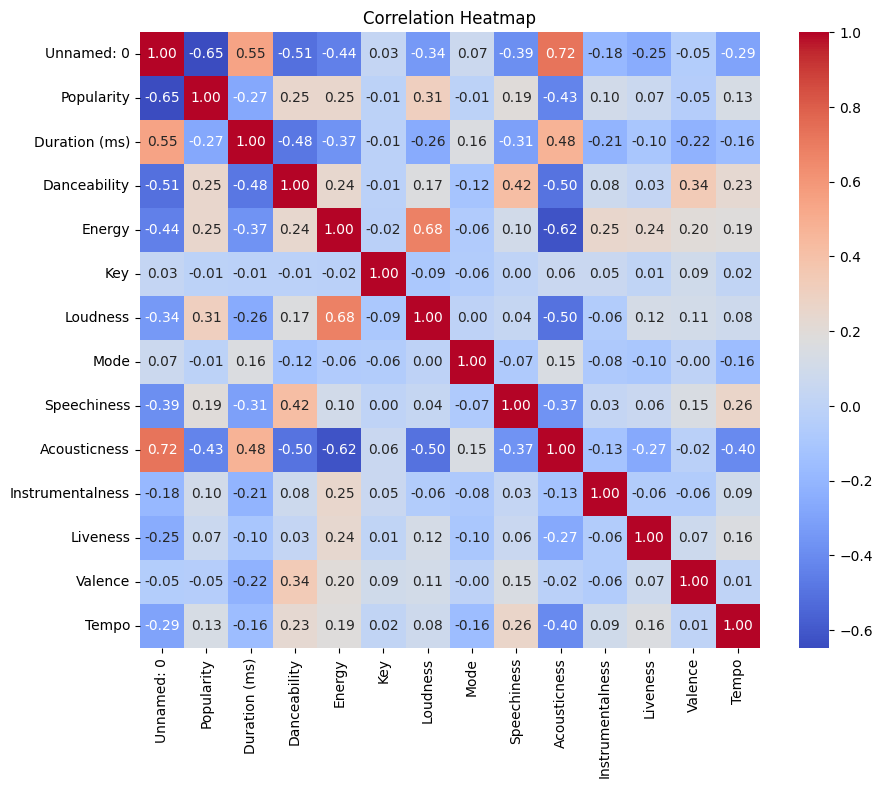

In [5]:
# Correlation heatmap
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=np.number)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

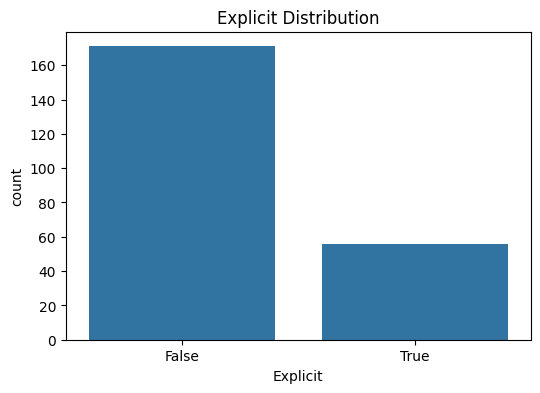

In [6]:
# Categorical feature analysis: Explicit
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Explicit')
plt.title('Explicit Distribution')
plt.show()

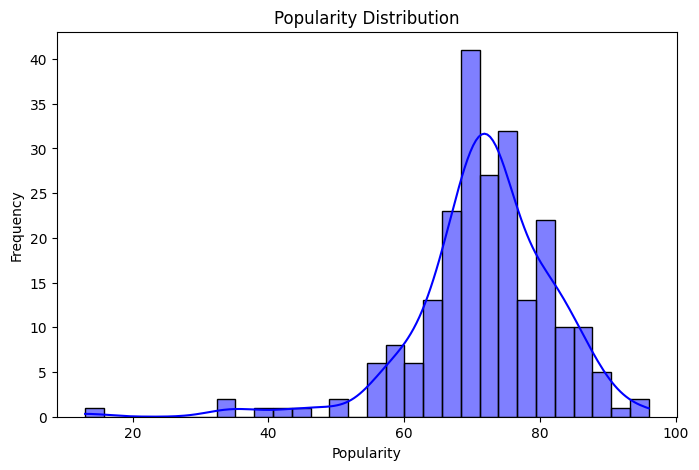

In [7]:
# Distribution of Popularity
plt.figure(figsize=(8, 5))
sns.histplot(df['Popularity'], kde=True, bins=30, color='blue')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

OTLIER TREATEMENT

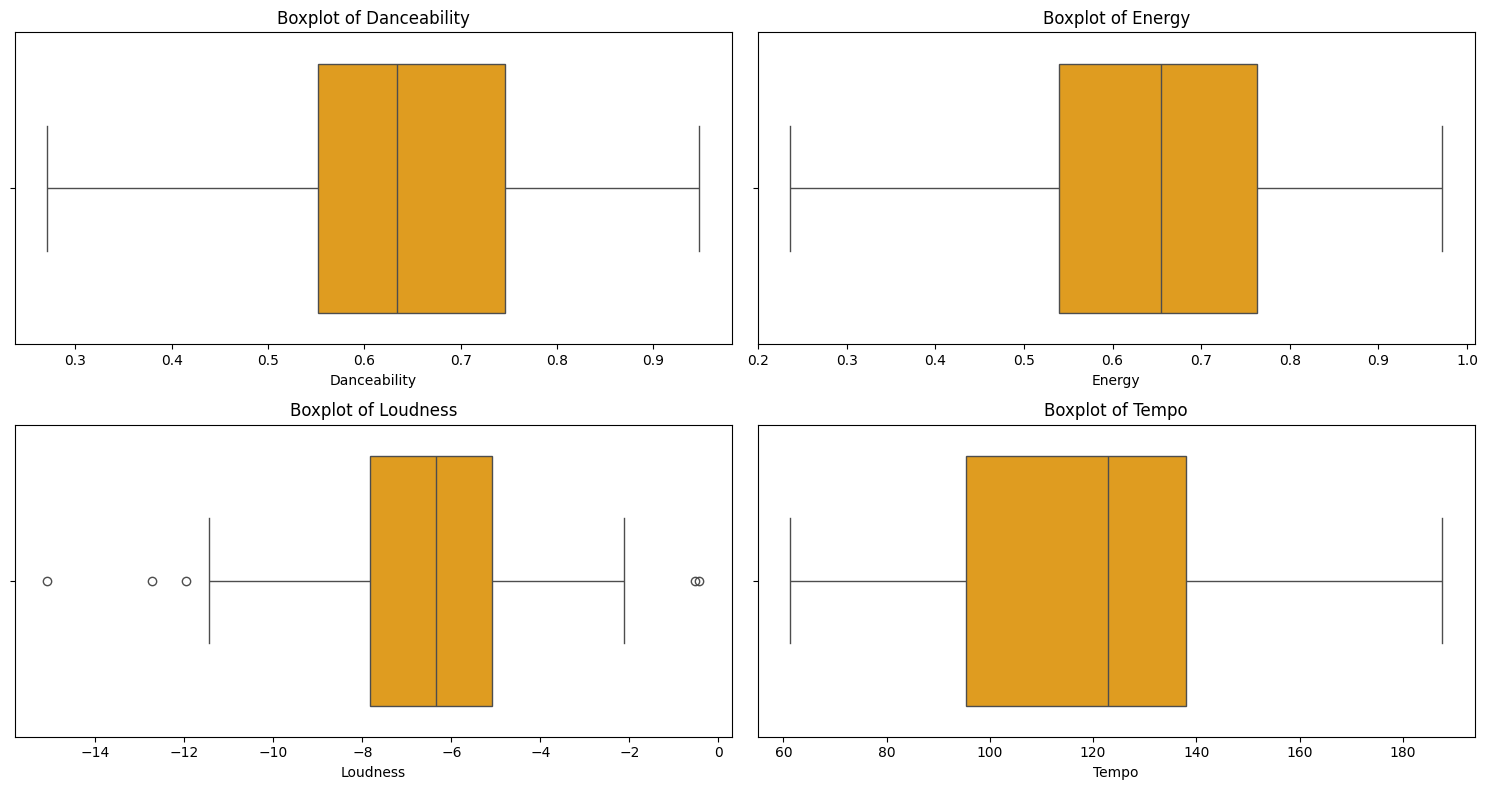


Outlier Details:
Danceability:
  Lower Bound: 0.2610000000000001
  Upper Bound: 1.037
  Outlier Count: 0
Energy:
  Lower Bound: 0.20350000000000013
  Upper Bound: 1.0995
  Outlier Count: 0
Loudness:
  Lower Bound: -11.95425
  Upper Bound: -0.9562499999999998
  Outlier Count: 5
Tempo:
  Lower Bound: 31.715749999999993
  Upper Bound: 201.69375
  Outlier Count: 0


In [8]:
# Convert Release Date to datetime and extract Year
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Year'] = df['Release Date'].dt.year

numerical_cols = ['Danceability', 'Energy', 'Loudness', 'Tempo']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col, color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Check for outliers using IQR
outlier_info = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers)
    }
# Print outlier details
print("\nOutlier Details:")
for col, info in outlier_info.items():
    print(f"{col}:")
    for key, value in info.items():
        print(f"  {key}: {value}")

In [9]:
# Define the lower and upper bounds for the Loudness column
Q1_loudness = df['Loudness'].quantile(0.25)
Q3_loudness = df['Loudness'].quantile(0.75)
IQR_loudness = Q3_loudness - Q1_loudness
lower_bound_loudness = Q1_loudness - 1.5 * IQR_loudness
upper_bound_loudness = Q3_loudness + 1.5 * IQR_loudness

# Impute outliers by capping at the bounds
df['Loudness'] = df['Loudness'].apply(
    lambda x: lower_bound_loudness if x < lower_bound_loudness else (
        upper_bound_loudness if x > upper_bound_loudness else x
    )
)

# Verify the changes
outliers_after_imputation = df[(df['Loudness'] < lower_bound_loudness) | (df['Loudness'] > upper_bound_loudness)]
print(f"Outliers in 'Loudness' after imputation: {len(outliers_after_imputation)}")

Outliers in 'Loudness' after imputation: 0


#FEATURE ENGG

In [10]:
# Feature Engineering: Interaction terms
df['Energy_Danceability'] = df['Energy'] * df['Danceability']

# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Track Name', 'Artists', 'Album Name',
              'Album ID', 'Track ID', 'External URLs', 'Release Date'], axis=1)

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature-target correlation
X = df.drop('Popularity', axis=1)
y = df['Popularity']
X.head()

,Duration (ms),Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Release Year,Energy_Danceability
0,274192,True,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061,2024,0.423856
1,227239,True,0.936,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003,2024,0.830232
2,140733,True,0.882,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113,2024,0.673848
3,149668,False,0.681,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976,2024,0.486234
4,144846,False,0.788,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019,2024,0.737568


In [12]:
from sklearn.feature_selection import SelectKBest, f_regression
# Use SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Create a DataFrame of scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)

                Feature      Score
8          Acousticness  51.366004
1              Explicit  44.252877
13         Release Year  29.198933
14  Energy_Danceability  28.014767
5              Loudness  23.970855
0         Duration (ms)  17.623038
2          Danceability  15.247971
3                Energy  15.008731
7           Speechiness   8.483953
12                Tempo   3.978846
9      Instrumentalness   2.500861
10             Liveness   0.987689
11              Valence   0.468426
4                   Key   0.016450
6                  Mode   0.015299


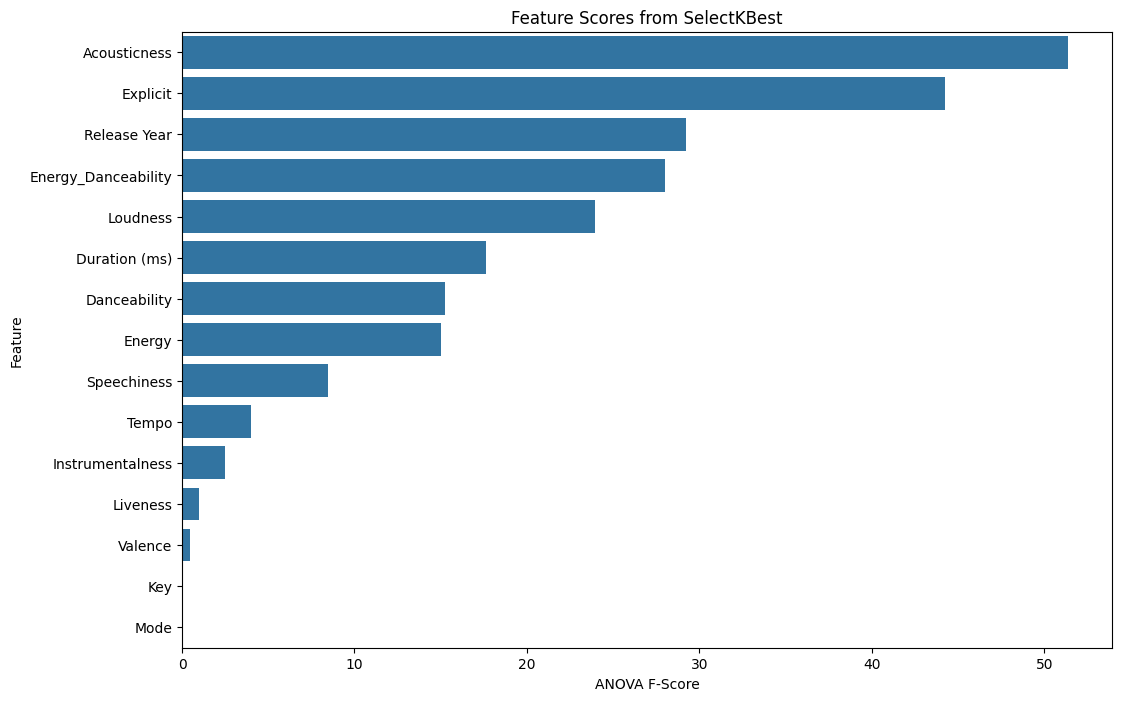

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Scores from SelectKBest')
plt.xlabel('ANOVA F-Score')
plt.ylabel('Feature')
plt.show()

Selecting best feature

In [14]:
selector = SelectKBest(score_func=f_regression, k=8)
X_selected = selector.fit_transform(X, y)

# Display selected feature scores
selected_features = X.columns[selector.get_support()]
print("Selected Features and Scores:")
for feature, score in zip(selected_features, selector.scores_[selector.get_support()]):
    print(f"{feature}: {score}")

Selected Features and Scores:
Duration (ms): 17.623037868606445
Explicit: 44.25287706996436
Danceability: 15.24797130595142
Energy: 15.008730562547187
Loudness: 23.97085512954514
Acousticness: 51.3660039007036
Release Year: 29.19893341567733
Energy_Danceability: 28.014766630473083


In [15]:
X_selected

array([[2.74192e+05, 1.00000e+00, 8.98000e-01, ..., 1.07000e-02,
        2.02400e+03, 4.23856e-01],
       [2.27239e+05, 1.00000e+00, 9.36000e-01, ..., 2.92000e-02,
        2.02400e+03, 8.30232e-01],
       [1.40733e+05, 1.00000e+00, 8.82000e-01, ..., 3.59000e-01,
        2.02400e+03, 6.73848e-01],
       ...,
       [2.81992e+05, 0.00000e+00, 4.84000e-01, ..., 4.79000e-01,
        2.01600e+03, 2.73460e-01],
       [3.05232e+05, 0.00000e+00, 6.02000e-01, ..., 9.24000e-01,
        2.02300e+03, 2.25148e-01],
       [3.71791e+05, 0.00000e+00, 2.96000e-01, ..., 4.49000e-01,
        2.01900e+03, 1.72272e-01]])

In [16]:
# prompt: drop Mode , key, valence, liveness, instrumental, tempo from X

# Drop specified columns from X
X = X.drop(['Mode', 'Key', 'Valence', 'Liveness', 'Instrumentalness', 'Tempo'], axis=1)

In [17]:
# Applying standard scaler to X

from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix (DataFrame)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame
print(X_scaled.head())

   Duration (ms)  Explicit  Danceability    Energy  Loudness  Speechiness  \
0       0.910307  1.747447      1.695049 -1.099916 -0.245352    -0.023274   
1       0.132297  1.747447      1.940558  1.513456  1.847457    -0.132799   
2      -1.301106  1.747447      1.591677  0.738890  0.623156     1.465327   
3      -1.153053 -0.572263      0.293067  0.424026  0.931082    -0.573255   
4      -1.232953 -0.572263      0.984367  1.822023  0.103532     2.607687   

   Acousticness  Release Year  Energy_Danceability  
0     -1.216877      0.863977             0.044165  
1     -1.155091      0.863977             2.665025  
2     -0.053636      0.863977             1.656450  
3     -1.127371      0.863977             0.446462  
4     -1.176131      0.863977             2.067403  


In [18]:
y

,Popularity
0,96
1,94
2,91
3,90
4,89
...,...
222,66
223,58
224,62
225,65


In [19]:
#  Applying standard scaler to y

# Assuming y is your target variable (Series)
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)) # Reshape for single feature scaling
y_scaled = pd.Series(y_scaled.flatten(), name='Popularity') # Convert back to Series
print(y_scaled.head())

0    2.363335
1    2.167612
2    1.874027
3    1.776166
4    1.678304
Name: Popularity, dtype: float64


#Building Pipeline and evlauting Models:
Linear Regression, Ridge and Lasso Regression, Random Forest Regressor, XGBRegressor

In [20]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines for each model
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),  # Standardization for linear models
    ('model', LinearRegression())
])

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=0.1))
])

pipeline_rf = Pipeline([
    ('model', RandomForestRegressor(random_state=42))
])

pipeline_xgb = Pipeline([
    ('model', XGBRegressor(random_state=42, objective='reg:squarederror'))
])

# Train the models
pipelines = {
    'Linear Regression': pipeline_linear,
    'Ridge Regression': pipeline_ridge,
    'Lasso Regression': pipeline_lasso,
    'Random Forest': pipeline_rf,
    'XGBoost': pipeline_xgb
}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)

# Evaluate each model
print("Model Performance:")
results = {}
for name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R²': r2}
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")



Model Performance:
Linear Regression - RMSE: 7.01, R²: 0.26
Ridge Regression - RMSE: 7.01, R²: 0.26
Lasso Regression - RMSE: 7.12, R²: 0.24
Random Forest - RMSE: 5.80, R²: 0.50
XGBoost - RMSE: 6.13, R²: 0.44


#Hyper parameter Tuning
for lasso and ridge

In [21]:
from sklearn.model_selection import GridSearchCV

# Ridge Regression Hyperparameter Tuning
ridge_param_grid = {
    'model__alpha': [0.1, 1.0, 10, 100]
}
ridge_grid = GridSearchCV(pipeline_ridge, ridge_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
ridge_grid.fit(X_train, y_train)

# Lasso Regression Hyperparameter Tuning
lasso_param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1.0]
}
lasso_grid = GridSearchCV(pipeline_lasso, lasso_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
lasso_grid.fit(X_train, y_train)

# Evaluate the tuned Ridge model
ridge_best = ridge_grid.best_estimator_
ridge_pred = ridge_best.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Tuned Ridge Regression - RMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.2f}")

# Evaluate the tuned Lasso model
lasso_best = lasso_grid.best_estimator_
lasso_pred = lasso_best.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Tuned Lasso Regression - RMSE: {lasso_rmse:.2f}, R²: {lasso_r2:.2f}")

# Existing RF and XGB hyperparameter tuning remains as previously mentioned



Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuned Ridge Regression - RMSE: 7.01, R²: 0.26
Tuned Lasso Regression - RMSE: 7.01, R²: 0.26


#Hyper parameter Tuning
For Xgbregressor and Random forest

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest hyperparameter tuning
rf_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(pipeline_rf, rf_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
rf_grid.fit(X_train, y_train)

# XGBoost hyperparameter tuning
xgb_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.3]
}
xgb_grid = GridSearchCV(pipeline_xgb, xgb_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
xgb_grid.fit(X_train, y_train)

# Best parameters and models
rf_best = rf_grid.best_estimator_
xgb_best = xgb_grid.best_estimator_

# Evaluate the tuned Random Forest model
rf_best_pred = rf_best.predict(X_test)
rf_best_rmse = np.sqrt(mean_squared_error(y_test, rf_best_pred))
rf_best_r2 = r2_score(y_test, rf_best_pred)
print(f"Tuned Random Forest: RMSE={rf_best_rmse:.2f}, R^2={rf_best_r2:.2f}")

# Evaluate the tuned XGBoost model
xgb_best_pred = xgb_best.predict(X_test)
xgb_best_rmse = np.sqrt(mean_squared_error(y_test, xgb_best_pred))
xgb_best_r2 = r2_score(y_test, xgb_best_pred)
print(f"Tuned XGBoost: RMSE={xgb_best_rmse:.2f}, R^2={xgb_best_r2:.2f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tuned Random Forest: RMSE=5.93, R^2=0.47
Tuned XGBoost: RMSE=5.85, R^2=0.49


Feature Importance graph for Random forest regressor and XGBRegressor

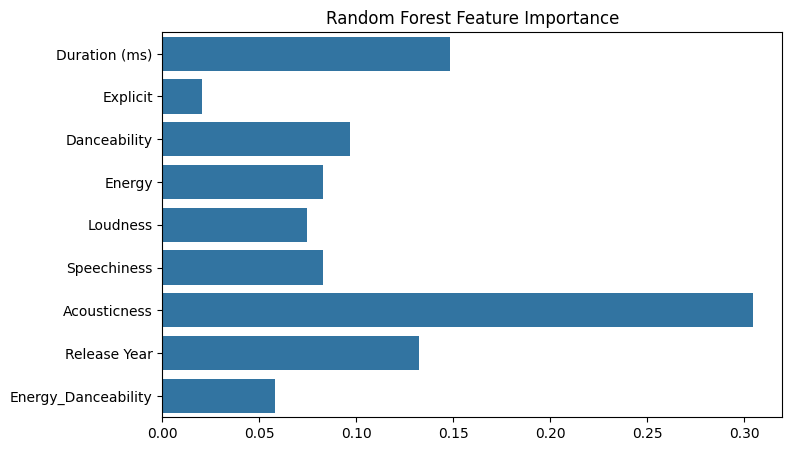

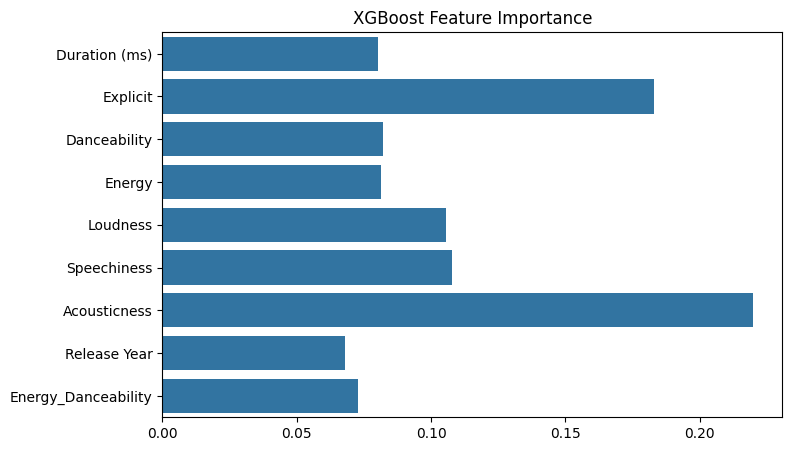

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


selected_features = X_train.columns

# Feature importance
rf_importances = rf_best.named_steps['model'].feature_importances_
xgb_importances = xgb_best.named_steps['model'].feature_importances_

plt.figure(figsize=(8, 5))
# Ensure selected_features is a list or array-like object
sns.barplot(x=rf_importances, y=selected_features.tolist())
plt.title("Random Forest Feature Importance")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=xgb_importances, y=selected_features.tolist())
plt.title("XGBoost Feature Importance")
plt.show()